### Higher order Tikhonov 
Author: OJM  

- Implementations using minimial libraries (just scipy and numpy etc)  
- Better to use e.g. sklearn implementations

In [56]:
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

### Signals

In [57]:
n = 4000
t = np.linspace(0,n,4000)

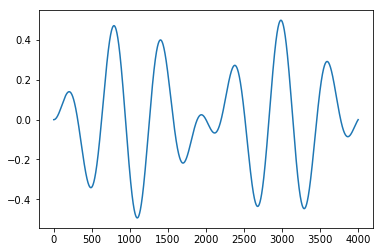

In [58]:
signal = 0.5*np.sin(2*t*np.pi/n)*np.sin(0.01*t)
plt.plot(t,signal)
plt.show()

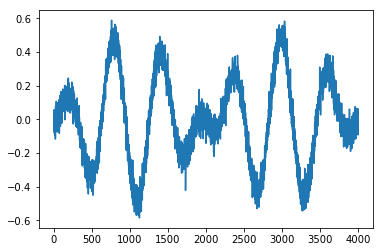

In [59]:
signal_noisy = signal + 0.05*np.random.normal(0,1,size=len(t))
plt.plot(t,signal_noisy)
plt.show()

### Forward model  

In [60]:
A = np.eye(len(signal_noisy))
print(A)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


#### First derviative (model)

In [61]:
D1 = np.zeros(A.shape)
diff_row = np.zeros(len(signal_noisy))
diff_row[0] = -1
diff_row[1] = 1
for i in range(0,len(signal_noisy)):
    D1[i,:] = np.roll(diff_row,i)
print(D1)

[[-1.  1.  0. ...,  0.  0.  0.]
 [ 0. -1.  1. ...,  0.  0.  0.]
 [ 0.  0. -1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -1.  1.  0.]
 [ 0.  0.  0. ...,  0. -1.  1.]
 [ 1.  0.  0. ...,  0.  0. -1.]]


#### Second derviative (model)  

In [62]:
D2 = np.zeros(A.shape)
second_diff_row = np.zeros(len(signal_noisy))
second_diff_row [0] = 1
second_diff_row [1] = -2
second_diff_row [2] = 1
for i in range(0,len(signal_noisy)):
    D2[i,:] = np.roll(second_diff_row ,i)
print(D2)

[[ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 1.  0.  0. ...,  0.  1. -2.]
 [-2.  1.  0. ...,  0.  0.  1.]]


#### Inversions

In [67]:
#augment as function of regularisation parameter alpha and D
Ap_aug = lambda alpha, D : np.vstack([A,alpha*D])
signal_noisy_aug = np.hstack([signal_noisy,np.zeros(len(signal_noisy))])
alphav = np.logspace(-2, 2.0, num=10)

In [68]:
signal_smooth_solns = np.zeros((len(signal_noisy),len(alphav)))
D = np.copy(D2)
for i, alpha in enumerate(alphav):
    #invert
    signal_smooth_solns[:,i] = np.linalg.lstsq(Ap_aug(alpha,D),signal_noisy_aug)[0]
    #Ap_aug_pinv = np.linalg.pinv(Ap_aug(alpha,D))
    #signal_smooth = np.dot(Ap_aug_pinv,signal_noisy)

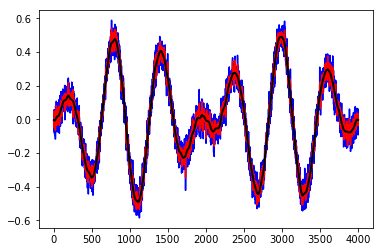

In [73]:
plt.plot(signal_smooth_solns[:,0],'b')
plt.plot(signal_smooth_solns[:,4],'r')
plt.plot(signal_smooth_solns[:,9],'k',linewidth=2)
plt.show()

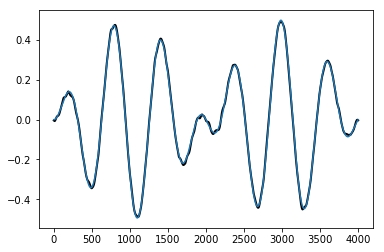

In [71]:
plt.plot(signal_smooth_solns[:,9],'k',linewidth=2)
plt.plot(signal)
plt.show()